# Capstone Project 1: MuscleHub AB Test

In [28]:
# Importing sql query from codecademy. each sql query will be passed like a function.
from codecademySQL import sql_query

In [29]:
# Displaying some data using sql_query
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [30]:
# Here's where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

In [31]:
# Examine visits table here
sql_query('''
SELECT * 
FROM visits
LIMIT 5;
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [32]:
# Examine fitness_tests table here
sql_query('''
SELECT * 
FROM fitness_tests
LIMIT 5;
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [33]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5;
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [34]:
# Examine purchases table here
sql_query('''
SELECT *
FROM purchases
LIMIT 5;
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [35]:
# Here im joining data from all tables where visit_dates is on or after 7-1-17
df = sql_query('''
SELECT visits.first_name,
        visits.last_name,
        visits.visit_date,
        visits.email,
        fitness_tests.fitness_test_date,
        applications.application_date,
        purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17';
''')
df

,first_name,last_name,visit_date,email,fitness_test_date,application_date,purchase_date
0,Kim,Walter,7-1-17,KimWalter58@gmail.com,2017-07-03,None,None
1,Tom,Webster,7-1-17,TW3857@gmail.com,2017-07-02,None,None
2,Edward,Bowen,7-1-17,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04
3,Marcus,Bauer,7-1-17,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,7-1-17,RB6305@hotmail.com,2017-07-02,None,None
...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,RachelHensley38@gmail.com,None,None,None
5000,Leon,Harmon,9-9-17,Leon.Harmon@gmail.com,2017-09-15,None,None
5001,Andy,Pratt,9-9-17,AndyPratt27@gmail.com,2017-09-15,None,None
5002,Ruben,Nielsen,9-9-17,RubenNielsen93@hotmail.com,None,2017-09-13,None


In [36]:
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
# Adding column to the table to create an a/b test group
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:
                                                'A' if pd.notnull(x) else 'B')

In [38]:
# getting a count to check if the groups a and b were split evenly
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


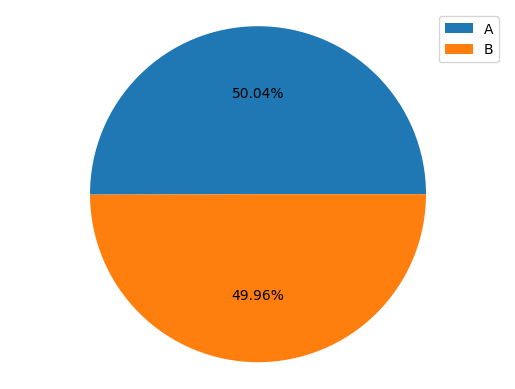

<Figure size 640x480 with 0 Axes>

In [39]:
# Creating a pie chart to show the number of people who were picked for the fitness test (test group A)

plt.pie(ab_counts.first_name.values, autopct = '%0.2f%%')
plt.axis('equal')
plt.legend(ab_counts.ab_test_group)
plt.show()
plt.savefig('ab_test_pie_chart.png')

In [40]:
# Creating a new column to see what people filled out an application 
df['is_application'] = df.application_date.apply(lambda x:
                                                'Application' if pd.notnull(x) else 'No Application')

In [41]:
# Counting how many people from Group A and Group B either do or don't pick up an application

app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()

In [42]:
# Pivoting app_counts so calculating the percent of people in each group who complete an application will be easier 
app_pivot = app_counts.pivot(index = 'ab_test_group',
                             columns = 'is_application',
                             values = 'first_name').reset_index()

In [43]:
# Calculating the sum of applications and non applications

app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']

In [44]:
# calculating the percent of people who filled out applications and assigning it to a column

app_pivot['Percent with Application'] = app_pivot['Application'] / app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


In [45]:
# Using a hypothesis test to check if the difference between group b and group a is statiscially significant

from scipy.stats import chi2_contingency

contingency = [[250, 2254], [325, 2175]]
stat, pval, dof, expected = chi2_contingency(contingency)

if pval < 0.05:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis can not be rejected')

The null hypothesis can be rejected


In [46]:
# Adding a column for is member or not
df['is_member'] = df.purchase_date.apply(lambda x:
                          'Member' if pd.notnull(x) else 'Not Member')
df.head()

,first_name,last_name,visit_date,email,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,7-1-17,KimWalter58@gmail.com,2017-07-03,None,None,A,No Application,Not Member
1,Tom,Webster,7-1-17,TW3857@gmail.com,2017-07-02,None,None,A,No Application,Not Member
2,Edward,Bowen,7-1-17,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,7-1-17,RB6305@hotmail.com,2017-07-02,None,None,A,No Application,Not Member


In [47]:
# Creating a new dataframe for only the people who filled out applications

just_apps = df[df.is_application == 'Application']
just_apps.head()

,first_name,last_name,visit_date,email,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,7-1-17,Edward.Bowen@gmail.com,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,Marcus.Bauer@gmail.com,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,7-1-17,SCardenas1980@gmail.com,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,7-1-17,VMunoz1998@gmail.com,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,7-1-17,MB9820@gmail.com,None,2017-07-07,2017-07-13,B,Application,Member


In [48]:
# doing a groupby to find out how many people in just_apps are and aren't members from each group.

mem_group = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

#pivoting mem_group table
mem_pivot = mem_group.pivot(index = 'ab_test_group',
                             columns = 'is_member',
                             values = 'first_name').reset_index()

#creating column for total people given the tests
mem_pivot['Total'] = mem_pivot['Member'] + mem_pivot['Not Member']

#creating column for percent of people who purchased a membership 
mem_pivot['Percent Purchase'] = mem_pivot['Member'] / mem_pivot['Total']


mem_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


In [49]:
# Using a hypothesis test to check if the difference between group b and group a is statiscially significant

from scipy.stats import chi2_contingency

contingency_table = [[200, 50], [250, 75]]
stat, pval, dof, expected = chi2_contingency(contingency_table)

if pval < 0.05:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis can not be rejected')

The null hypothesis can not be rejected


In [50]:
# Finding out what percent of all visitors purchased memberships.

final_member_count = df.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

#pivoting mem_group table
final_member_pivot = final_member_count.pivot(index = 'ab_test_group',
                             columns = 'is_member',
                             values = 'first_name').reset_index()

#creating column for total people given the tests
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']

#creating column for percent of people who purchased a membership 
final_member_pivot['Percent Purchase'] = final_member_pivot['Member'] / final_member_pivot['Total']
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


In [51]:
from scipy.stats import chi2_contingency

contingency_table = [[200, 2304], [250, 2250]]
stat, pval, dof, expected = chi2_contingency(contingency_table)

if pval < 0.05:
    print('The null hypothesis can be rejected')
else:
    print('The null hypothesis can not be rejected')

The null hypothesis can be rejected


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

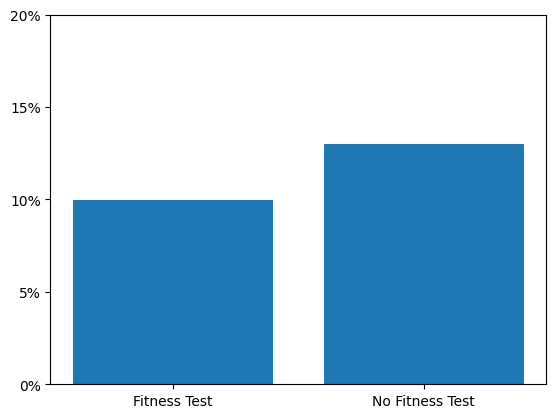

In [52]:
# Creating a bar chart for the percent of visitors that applied

ax = plt.subplot()
plt.bar(range(len(app_pivot)), app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
# plt.savefig('percent_visitors_apply.png')




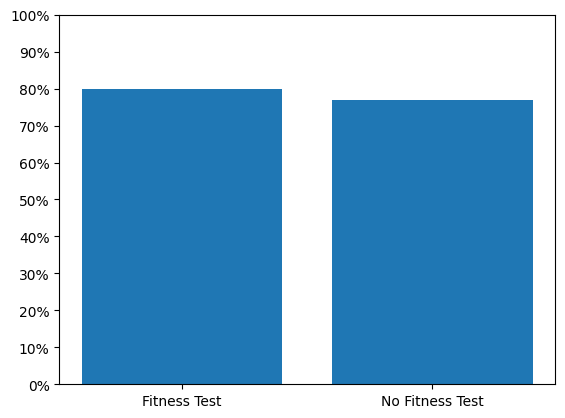

In [53]:
# Creating a bar chart for percent of visitors who purchased memberships

ax = plt.subplot()
plt.bar(range(len(mem_pivot)), mem_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(mem_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_visitors_purchase.png')

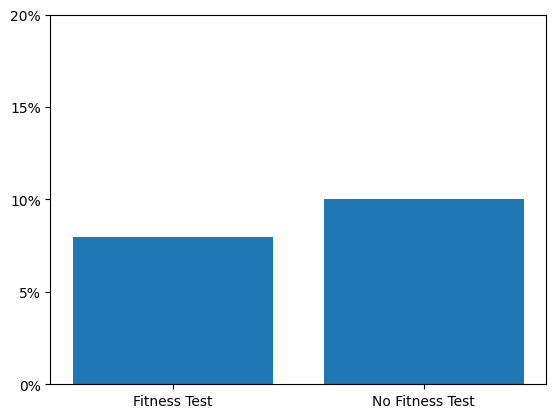

In [54]:
# Bar chart for the table final member pivot 

ax = plt.subplot()
plt.bar(range(len(final_member_pivot)), final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(final_member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
# plt.savefig('final_percent_visitors_purchase.png')